<a href="https://colab.research.google.com/github/psourabh094/STOCK_ML_PRO./blob/main/cripto_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2013-01-01'

end = '2023-12-24'
stock = 'APT21794-USD'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-19,8.384907,8.552428,6.687963,7.240589,7.240589,1893697459
1,2022-10-20,7.265749,7.696688,6.960000,7.360025,7.360025,529639711
2,2022-10-21,7.359728,7.655118,7.058326,7.495839,7.495839,538678089
3,2022-10-22,7.495905,9.227824,7.355244,8.933971,8.933971,1010096593
4,2022-10-23,8.939706,10.246318,8.930175,9.768685,9.768685,1563614567
...,...,...,...,...,...,...,...
426,2023-12-19,7.886517,8.089874,7.701842,8.087446,8.087446,162538045
427,2023-12-20,8.097752,8.311811,7.950335,8.101476,8.101476,178420631
428,2023-12-21,8.103542,8.681809,8.029247,8.535920,8.535920,190409178
429,2023-12-22,8.531353,9.400302,8.343507,9.269244,9.269244,273441863


In [ ]:
ma_100_days = data.Close.rolling(75).mean()

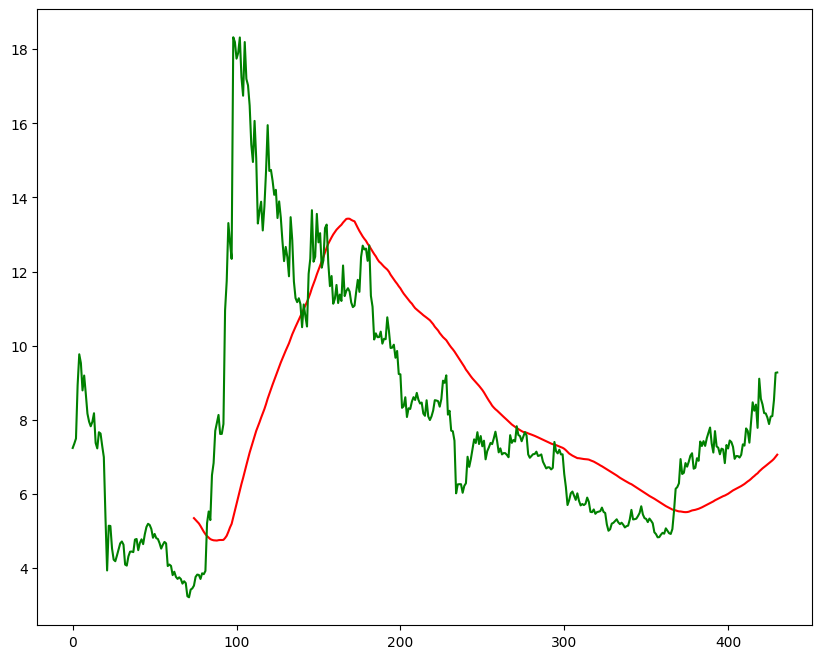

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
 ma_200_days = data.Close.rolling(200).mean()
 ma_25_days = data.Close.rolling(25).mean()

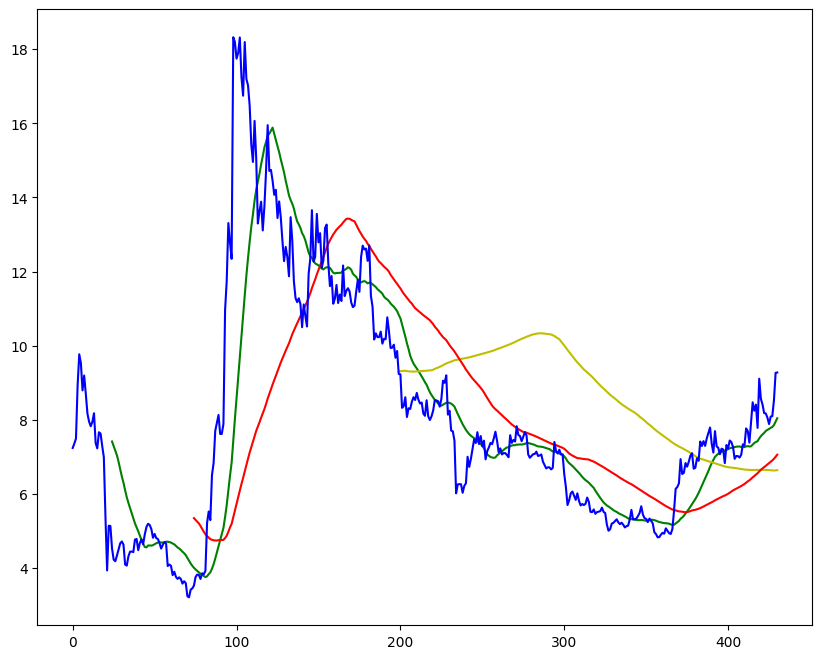

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(ma_25_days, 'g')
plt.plot(ma_200_days, 'y')
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'b')
plt.show()

In [ ]:
data.shape

(431, 7)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])

data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0]

344

In [ ]:
data_test.shape[0]

187

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [ ]:
x,y = np.array(x),np.array(y)

In [ ]:
#import library
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu', return_sequences = True))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [ ]:
#compile our model

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
8/8 [==============================] - 9s 583ms/step - loss: 0.1541
Epoch 2/50
8/8 [==============================] - 6s 532ms/step - loss: 0.0776
Epoch 3/50
8/8 [==============================] - 4s 464ms/step - loss: 0.0639
Epoch 4/50
8/8 [==============================] - 5s 634ms/step - loss: 0.0580
Epoch 5/50
8/8 [==============================] - 4s 486ms/step - loss: 0.0564
Epoch 6/50
8/8 [==============================] - 4s 461ms/step - loss: 0.0547
Epoch 7/50
8/8 [==============================] - 4s 563ms/step - loss: 0.0530
Epoch 8/50
8/8 [==============================] - 5s 537ms/step - loss: 0.0529
Epoch 9/50
8/8 [==============================] - 5s 705ms/step - loss: 0.0520
Epoch 10/50
8/8 [==============================] - 11s 1s/step - loss: 0.0524
Epoch 11/50
8/8 [==============================] - 8s 1s/step - loss: 0.0516
Epoch 12/50
8/8 [==============================] - 5s 636ms/step - loss: 0.0513
Epoch 13/50
8/8 [==============================] - 8s 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 120)         

In [ ]:
pass_100_days = data_train.tail(100)

In [ ]:
pass_100_days

,Close
244,7.214708
245,7.473722
246,7.374989
247,7.666320
248,7.346627
...,...
339,5.146468
340,5.313130
341,5.570585
342,5.312890


from matplotlib import pyplot as plt
pass_100_days['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pass_100_days['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data_test = pd.concat([pass_100_days, data_test],ignore_index=True)

In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])




In [ ]:
x,y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

6/6 [==============================] - 1s 69ms/step


In [ ]:
#checking y_predict data
y_predict

array([[[0.18479632],
        [0.2666454 ],
        [0.32706657],
        ...,
        [0.38096306],
        [0.3810568 ],
        [0.3811024 ]],

       [[0.18478173],
        [0.26655734],
        [0.32683808],
        ...,
        [0.38105676],
        [0.3811024 ],
        [0.3810878 ]],

       [[0.18478726],
        [0.26657408],
        [0.32684505],
        ...,
        [0.3811024 ],
        [0.3810878 ],
        [0.38099805]],

       ...,

       [[0.1849128 ],
        [0.26748577],
        [0.32980233],
        ...,
        [0.3826575 ],
        [0.38283938],
        [0.38297918]],

       [[0.18490325],
        [0.26744148],
        [0.3296934 ],
        ...,
        [0.38283938],
        [0.38297918],
        [0.3830934 ]],

       [[0.18490168],
        [0.2674334 ],
        [0.32966316],
        ...,
        [0.38297918],
        [0.3830934 ],
        [0.38321418]]], dtype=float32)

In [ ]:
#convert data with achual values
scale=1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

ValueError: ignored

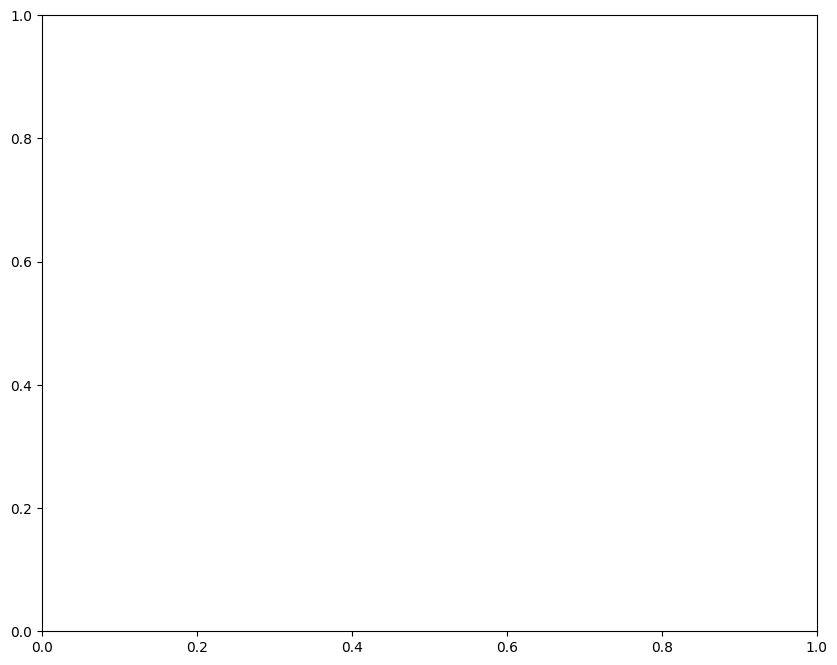

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, label='predicted price')
plt.plot(y, 'g', label= 'original price')
plt.xlabel('Time')
plt.ylabel('Price')
#plt.legend()
plt.show()

In [ ]:
model.save('cripto predictions Model.keras')